# LIMPEZA E TRANSFORMAÇÃO DOS DADOS (PASSO A PASSO)


<p>Este Jupiter Notebook executa de forma detalhada todo o proceso de limpeza e transformação dos dados, para posterior modelação.</p>

 ## <h2>1. Importação de bibliotecas</h2>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## <h2>2. Carregar dataset original</h2>

In [3]:
df_origin = pd.read_csv("../data/dnd_dataset.csv")
df_origin.head()

,Unnamed: 0,char_id,name,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,...,class_starting_level,subclass_starting,class_other,subclass_other,total_level,feats,inventory,date_modified,notes_len,gold
0,0,1,Molster,8,11,22,11,17,20,12,...,4,NaN,NaN,NaN,4,NaN,Adamantine Chain Shirt/Cloak of Protection/Gog...,2022-09-12T19:13:03.29Z,17,305.00
1,1,3,Prailak,103,12,17,18,14,16,16,...,20,The Great Old One,NaN,NaN,20,"Spell Sniper (Bard, Sorcerer, Warlock)/Inferna...","Bag of Holding/Iron Flask/Studded Leather, +3/...",2021-12-07T21:25:36.9Z,60,0.00
2,2,8,Aurilanax,76,18,10,16,13,13,16,...,7,Oath of the Crown,NaN,NaN,7,NaN,Shield,2021-01-21T16:50:35Z,0,0.00
3,3,10,Gamndell Banglebon,127,10,14,16,16,15,18,...,2,NaN,Bard/Cleric/Wizard,School of Illusion,16,NaN,Give/Studded Leather/Dagger/Light Hammer/Ink (...,2020-08-06T16:05:07Z,65,4951.06
4,4,19,Bellek Bouncer,52,10,10,15,12,14,10,...,6,Life Domain,NaN,NaN,6,NaN,Shield/Plate/Mace/Potion of Healing,2020-05-15T04:47:59Z,0,0.00


## <h2>3. Análise da estrutura geral do dataset</h2>

<p > Aqui observamos os tipos de dados, presença de valores nulos e descrição estatística inicial</p>

In [4]:
#Estrutura geral e tipo de dados
df_origin.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204252 entries, 0 to 1204251
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1204252 non-null  int64  
 1   char_id               1204252 non-null  int64  
 2   name                  1199602 non-null  object 
 3   base_hp               1204252 non-null  int64  
 4   stats_1               1204252 non-null  int64  
 5   stats_2               1204252 non-null  int64  
 6   stats_3               1204252 non-null  int64  
 7   stats_4               1204252 non-null  int64  
 8   stats_5               1204252 non-null  int64  
 9   stats_6               1204252 non-null  int64  
 10  background            898870 non-null   object 
 11  race                  1204252 non-null  object 
 12  class_starting        1204252 non-null  object 
 13  class_starting_level  1204252 non-null  int64  
 14  subclass_starting     607804 non-n

In [5]:
# Estatistica descritiva do data set original
df_origin.describe()

,Unnamed: 0,char_id,base_hp,stats_1,stats_2,stats_3,stats_4,stats_5,stats_6,class_starting_level,total_level,notes_len,gold
count,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06,1.204252e+06
mean,6.021255e+05,8.760689e+05,2.347389e+01,1.051853e+01,1.153501e+01,1.146815e+01,1.025950e+01,1.091329e+01,1.066623e+01,3.952510e+00,4.209893e+00,2.440385e+02,1.336151e+06
std,3.476378e+05,4.414356e+05,2.677593e+01,4.829688e+00,4.918547e+00,4.744150e+00,4.565985e+00,4.745979e+00,4.844946e+00,4.344063e+00,4.640197e+00,9.688915e+02,1.131455e+08
min,0.000000e+00,1.000000e+00,-6.240000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-3.264000e+04,0.000000e+00
25%,3.010628e+05,5.446485e+05,8.000000e+00,8.000000e+00,1.000000e+01,1.100000e+01,8.000000e+00,1.000000e+01,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,6.021255e+05,8.185030e+05,1.200000e+01,1.100000e+01,1.300000e+01,1.300000e+01,1.100000e+01,1.200000e+01,1.200000e+01,2.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
75%,9.031882e+05,1.188040e+06,2.900000e+01,1.400000e+01,1.500000e+01,1.400000e+01,1.300000e+01,1.400000e+01,1.400000e+01,5.000000e+00,5.000000e+00,5.300000e+01,2.500000e+01
max,1.204251e+06,1.988091e+06,5.000000e+02,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,2.000000e+01,3.400000e+01,3.259300e+04,2.052099e+10


In [6]:
df_origin.isnull().sum()

Unnamed: 0                    0
char_id                       0
name                       4650
base_hp                       0
stats_1                       0
stats_2                       0
stats_3                       0
stats_4                       0
stats_5                       0
stats_6                       0
background               305382
race                          0
class_starting                0
class_starting_level          0
subclass_starting        596448
class_other             1125438
subclass_other          1155418
total_level                   0
feats                    985244
inventory                371961
date_modified                 0
notes_len                     0
gold                          0
dtype: int64

In [7]:
df_origin.isna().sum()

Unnamed: 0                    0
char_id                       0
name                       4650
base_hp                       0
stats_1                       0
stats_2                       0
stats_3                       0
stats_4                       0
stats_5                       0
stats_6                       0
background               305382
race                          0
class_starting                0
class_starting_level          0
subclass_starting        596448
class_other             1125438
subclass_other          1155418
total_level                   0
feats                    985244
inventory                371961
date_modified                 0
notes_len                     0
gold                          0
dtype: int64

## <h2>4. Verificação das colunas</h2>

In [8]:
df_origin.columns.to_list()

['Unnamed: 0',
 'char_id',
 'name',
 'base_hp',
 'stats_1',
 'stats_2',
 'stats_3',
 'stats_4',
 'stats_5',
 'stats_6',
 'background',
 'race',
 'class_starting',
 'class_starting_level',
 'subclass_starting',
 'class_other',
 'subclass_other',
 'total_level',
 'feats',
 'inventory',
 'date_modified',
 'notes_len',
 'gold']

### <h3>Análise mais detalhada de coluna que achámos importantes</h3>

In [9]:
for col in df_origin.columns:
    print(f"Coluna: {col}")
    print("Tipo:", df_origin[col].dtype)
    print("Valores únicos:", df_origin[col].nunique())
    print(df_origin[col].value_counts(dropna=False).head(5))
    print("\n---\n")

Coluna: Unnamed: 0
Tipo: int64
Valores únicos: 1204252
Unnamed: 0
1204251    1
0          1
1          1
2          1
3          1
Name: count, dtype: int64

---

Coluna: char_id
Tipo: int64
Valores únicos: 511272
char_id
608449    6
608457    6
608464    6
608468    6
608475    6
Name: count, dtype: int64

---

Coluna: name
Tipo: object
Valores únicos: 393262
name
NaN      4650
Test     1206
Bob      1003
test      505
Varis     469
Name: count, dtype: int64

---

Coluna: base_hp
Tipo: int64
Valores únicos: 339
base_hp
8     216849
10    146653
0     107784
6      71225
12     65897
Name: count, dtype: int64

---

Coluna: stats_1
Tipo: int64
Valores únicos: 30
stats_1
8     200679
15    177714
10    149672
0     145239
12    120819
Name: count, dtype: int64

---

Coluna: stats_2
Tipo: int64
Valores únicos: 28
stats_2
15    212856
14    176525
13    169066
0     146583
12    122596
Name: count, dtype: int64

---

Coluna: stats_3
Tipo: int64
Valores únicos: 29
stats_3
14    264529
13   

In [10]:
#  Esta análise ajudou a identificar colunas com alto número de categorias (ex.: `background`),
#  colunas com muitos valores nulos (ex.: `class_other`, `subclass_other`),
#  colunas de texto irrelevantes (`name`, `feats`, `inventory`) 
# e colunas dependentes da classe (`subclass_starting`, `class_starting_level`), 
# permitindo decidir com base em observações concretas.

## <h2>5. Eliminação de colunas irrelevantes ou possivélmente problemáticas, para o contexto do projecto.

In [11]:
df = df_origin.drop(columns=[
    'Unnamed: 0',         # indice duplicado
    'char_id', 'name',    # id's e nome irrelevantes 
    'subclass_starting', 'subclass_other', # dependem da classe , podem conter data leaks
    'feats', 'inventory', # depende da classe escolhida
    'date_modified', 'notes_len', # metadados irrelevantes
    'gold', # irrelevante pois é derivado de outras colunas
    'background' # correlacionado com a classe e pode conter data leaks
])

## <h2>6. Renomear nomes das colunas</h2>

In [12]:
df = df.rename(columns={
    'stats_1': 'strength',
    'stats_2': 'dexterity',
    'stats_3': 'constitution',
    'stats_4': 'intelligence',
    'stats_5': 'wisdom',
    'stats_6': 'charisma',
    'race': 'race',
    'class_starting': 'class_starting',
    'class_starting_level': 'class_starting_level',
    'class_other': 'class_other',
    'total_level': 'total_level',
    'base_hp': 'base_hp'
})

In [13]:
list(df.columns)

['base_hp',
 'strength',
 'dexterity',
 'constitution',
 'intelligence',
 'wisdom',
 'charisma',
 'race',
 'class_starting',
 'class_starting_level',
 'class_other',
 'total_level']

## <h2>7. Verificação dos tipos de dados ( novamente )</h2>

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1204252 entries, 0 to 1204251
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   base_hp               1204252 non-null  int64 
 1   strength              1204252 non-null  int64 
 2   dexterity             1204252 non-null  int64 
 3   constitution          1204252 non-null  int64 
 4   intelligence          1204252 non-null  int64 
 5   wisdom                1204252 non-null  int64 
 6   charisma              1204252 non-null  int64 
 7   race                  1204252 non-null  object
 8   class_starting        1204252 non-null  object
 9   class_starting_level  1204252 non-null  int64 
 10  class_other           78814 non-null    object
 11  total_level           1204252 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 110.3+ MB


In [15]:
# - 'classe_starting','class_other e 'race' estão como object. 
# Converter para 'category' para melhorar a performance.
# Converter também colunas int64 para int8, pois os valores são pequenos. (poupamos memoria)

In [16]:
# df['class_starting'] = df['class_starting'].astype('category')
# df['race'] = df['race'].astype('category')
# df['class_other'] = df['class_other'].astype('category')

# colunas_numericas = ['base_hp', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma','class_starting_level', 'total_level']
# colunas_stats = ['strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']
# df[colunas_numericas] = df[colunas_numericas].apply(pd.to_numeric)
# df.info()

## <h2>8. Análise e limpeza de valores inválidos (colunas numéricas)</h2>

In [17]:
colunas_numericas = ['base_hp', 'strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma','class_starting_level', 'total_level']
colunas_stats = ['strength', 'dexterity', 'constitution', 'intelligence', 'wisdom', 'charisma']
# Verificando se há valores negativos nas colunas numéricas
(df[colunas_numericas] <= 0).sum() 


base_hp                 108047
strength                145239
dexterity               146583
constitution            147461
intelligence            147873
wisdom                  147875
charisma                147813
class_starting_level         0
total_level                  0
dtype: int64

In [18]:
# Atributos com valor <=0 são inválidos no D&D 5e. HP negativo também foi identificado já no ponto 2 e foi removido.
df = df[(df[colunas_numericas] > 0).all(axis=1)]

#remover linahs da coluna 'total_level' com valor > 20
df = df[df['total_level'] <= 20]

# removew nas colunas de stats valores > 20
df = df[(df[colunas_stats] <= 20).all(axis=1)]

#remover nas colunas stats valores >=3
df = df[(df[colunas_stats] >= 3).all(axis=1)]


In [19]:
df[colunas_numericas].describe()

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level
count,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000,979774.000000
mean,26.664390,11.935367,13.111473,13.050568,11.671199,12.425593,12.130148,4.162315,4.468139
std,27.390858,3.027967,2.544125,2.161796,2.629042,2.570571,2.921360,4.439116,4.768886
min,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
25%,8.000000,10.000000,12.000000,12.000000,10.000000,10.000000,10.000000,1.000000,1.000000
50%,16.000000,12.000000,13.000000,13.000000,12.000000,13.000000,12.000000,3.000000,3.000000
75%,34.000000,15.000000,15.000000,14.000000,14.000000,14.000000,15.000000,5.000000,6.000000
max,500.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


## <h2>9. Distribuição da variávél alvo 'class_staring'  e 'class_other'</h2>

### <h3>'class_starting'</h3>

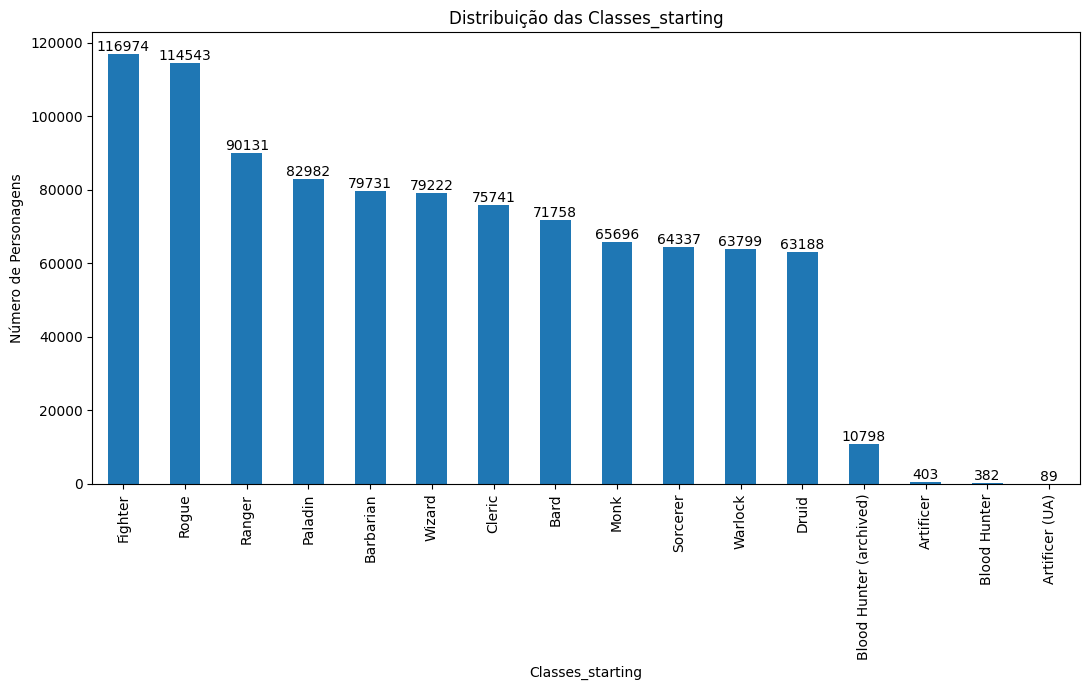

In [20]:
plt.figure(figsize=(11,7))
ax = df['class_starting'].value_counts().plot(kind='bar')
plt.title('Distribuição das Classes_starting')
plt.xlabel('Classes_starting')
plt.ylabel('Número de Personagens')
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')
plt.tight_layout()
plt.show()

In [21]:
# Tabela de classes e número de personagens:
tabela_classes = df['class_starting'].value_counts().reset_index()
tabela_classes.columns = ['Class_staring', 'Número de Personagens']
print(tabela_classes)

              Class_staring  Número de Personagens
0                   Fighter                 116974
1                     Rogue                 114543
2                    Ranger                  90131
3                   Paladin                  82982
4                 Barbarian                  79731
5                    Wizard                  79222
6                    Cleric                  75741
7                      Bard                  71758
8                      Monk                  65696
9                  Sorcerer                  64337
10                  Warlock                  63799
11                    Druid                  63188
12  Blood Hunter (archived)                  10798
13                Artificer                    403
14             Blood Hunter                    382
15           Artificer (UA)                     89


### <h3>'class_other'</h3>

In [22]:
# contar quantos unicos valores existem na coluna 'class_other'
print("Número de classes_other únicas:", df['class_other'].nunique())
# Tabela das 20 classes_other mais comuns
print(df['class_other'].value_counts().head(50).to_frame('Número de Personagens'))
# ! Identificado problema com a class_other !


Número de classes_other únicas: 974
                         Número de Personagens
class_other                                   
Warlock                                  10687
Fighter                                   9614
Rogue                                     8771
Sorcerer                                  6124
Cleric                                    5700
Wizard                                    5430
Bard                                      4240
Barbarian                                 3622
Ranger                                    3386
Druid                                     3087
Monk                                      2979
Paladin                                   2770
Blood Hunter (archived)                    435
Fighter/Rogue                              266
Rogue/Fighter                              233
Warlock/Sorcerer                           142
Warlock/Fighter                            118
Artificer                                  112
Rogue/Warlock           

In [23]:
# Verifica-se que existem 16 classes diferentes, embora Blood Hunter e Artificer sejam subclasses de outras classes, estejam divididos em 4 classes.
#Iremos agrupar Blood Hunter com Blood Hunter (archived) e Artificier com Artificier (UA)
# Verifica-se que exitestem 974 class_other uniques(falsos) ex: Figther/Warlock = Warlock/Fighter. Também existe o Blood Hunter (archived) e Artificer (UA).


 ## <h2>10. Normalização</h2>

In [24]:
#Lista de classes oficiais
classes_oficiais = [
    "Barbarian", "Bard", "Cleric", "Druid", "Fighter", "Monk",
    "Paladin", "Ranger", "Rogue", "Sorcerer", "Warlock", "Wizard", "Artificer", "Blood Hunter"
]

In [25]:
# Verifica se todas as classes oficiais estão presentes em class_starting e class_other

# Para class_starting
classes_dataset_starting = set(df['class_starting'].unique())
presentes_class_starting = [c for c in classes_oficiais if c in classes_dataset_starting]
faltam_class_starting = [c for c in classes_oficiais if c not in classes_dataset_starting]

# Para class_other (considerando todas as classes separadas por '/')
classes_dataset_other = set()
for val in df['class_other'].dropna():
    for c in val.split('/'):
        classes_dataset_other.add(c.strip())
presentes_class_other = [c for c in classes_oficiais if c in classes_dataset_other]
faltam_class_other = [c for c in classes_oficiais if c not in classes_dataset_other]

print("Classes oficiais presentes em class_starting:", presentes_class_starting)
print("Classes oficiais em falta em class_starting:", faltam_class_starting)
print("Classes oficiais presentes em class_other:", presentes_class_other)
print("Classes oficiais em falta em class_other:", faltam_class_other)

Classes oficiais presentes em class_starting: ['Barbarian', 'Bard', 'Cleric', 'Druid', 'Fighter', 'Monk', 'Paladin', 'Ranger', 'Rogue', 'Sorcerer', 'Warlock', 'Wizard', 'Artificer', 'Blood Hunter']
Classes oficiais em falta em class_starting: []
Classes oficiais presentes em class_other: ['Barbarian', 'Bard', 'Cleric', 'Druid', 'Fighter', 'Monk', 'Paladin', 'Ranger', 'Rogue', 'Sorcerer', 'Warlock', 'Wizard', 'Artificer', 'Blood Hunter']
Classes oficiais em falta em class_other: []


In [26]:
# Verifica quantas linhas existem com as classes Artificer (UA) e Blood Hunter (archived)
print("Contagem de linhas com Artificer (UA):", (df['class_starting'] == 'Artificer (UA)').sum())
print("Contagem de linhas com Blood Hunter (archived):", (df['class_starting'] == 'Blood Hunter (archived)').sum())


Contagem de linhas com Artificer (UA): 89
Contagem de linhas com Blood Hunter (archived): 10798


In [27]:
# Agrupar Artificer e Blood Hunter
# Replace mappings
replacement_map = {
    'Artificer (UA)': 'Artificer',
    'Blood Hunter (archived)': 'Blood Hunter'
}

### <h3>Normalizar a coluna 'class_startring'</h3>

In [28]:

df['class_starting'] = df['class_starting'].replace(replacement_map)

In [29]:
# Verifica se ainda existem linhas com os nomes antigos
print((df['class_starting'] == 'Artificer (UA)').sum())
print((df['class_starting'] == 'Blood Hunter (archived)').sum())

0
0


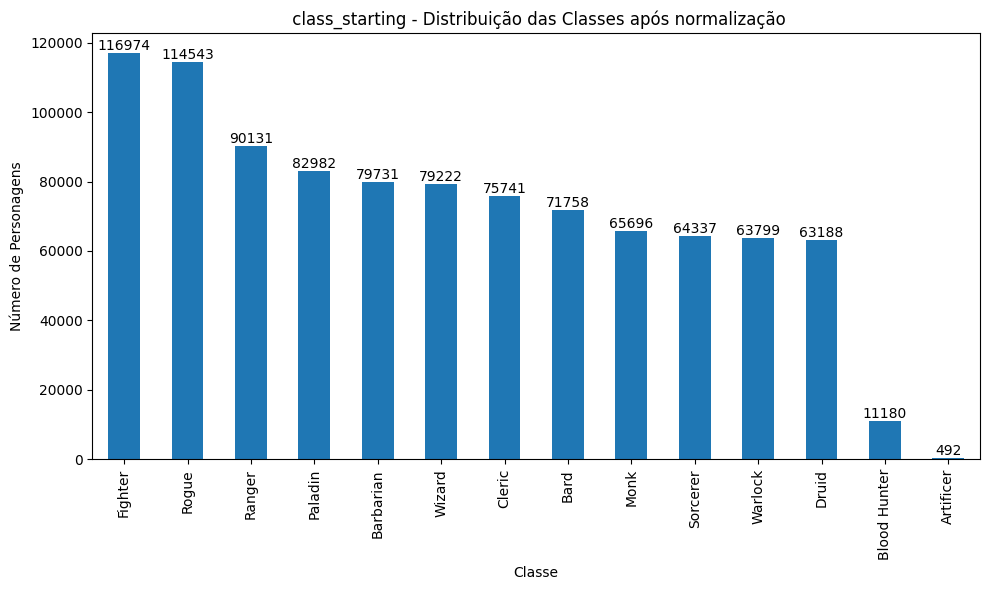

In [30]:
plt.figure(figsize=(10,6))
ax = df['class_starting'].value_counts().plot(kind='bar')
plt.title(' class_starting - Distribuição das Classes após normalização')
plt.xlabel('Classe')
plt.ylabel('Número de Personagens')
plt.tight_layout()

# Adiciona o número exato em cima de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

### <h3> Normalizar coluna 'class_other'</h3>

A coluna 'class_other' representa a multiclasse de um personagem.
Quando tem o campo vazio: personagem é uma classe "Pura"
Quando tem o campo preenchido: personagem é multiclasse

In [31]:
# Selecionar apenas as linhas onde class_other não é nulo
linhas_com_class_other = df['class_other'].notna()

In [32]:
# Dividir cada string em lista de classes
splitted = df.loc[linhas_com_class_other, 'class_other'].str.split('/')

In [33]:
# Limpar e normalizar cada classe
normalized = []
for parts in splitted:
    cleaned = []
    for p in parts:
        p_clean = p.strip() # remover espaços em branco
        p_final = replacement_map.get(p_clean, p_clean) # Usar o replacement map para agrupar Artificer (UA) e Blood Hunter (archived) a Artificer e Blood Hunter
        cleaned.append(p_final) # adicionar a classe limpa à lista
    cleaned_sorted = sorted(cleaned)    # garantir ordem consistente ( ex.: Fighter/Warlock e Warlock/Fighter)
    normalized.append('/'.join(cleaned_sorted)) # juntar novamente numa string

In [34]:
# Atualizar o DataFrame com os valores normalizados
df.loc[linhas_com_class_other, 'class_other'] = normalized

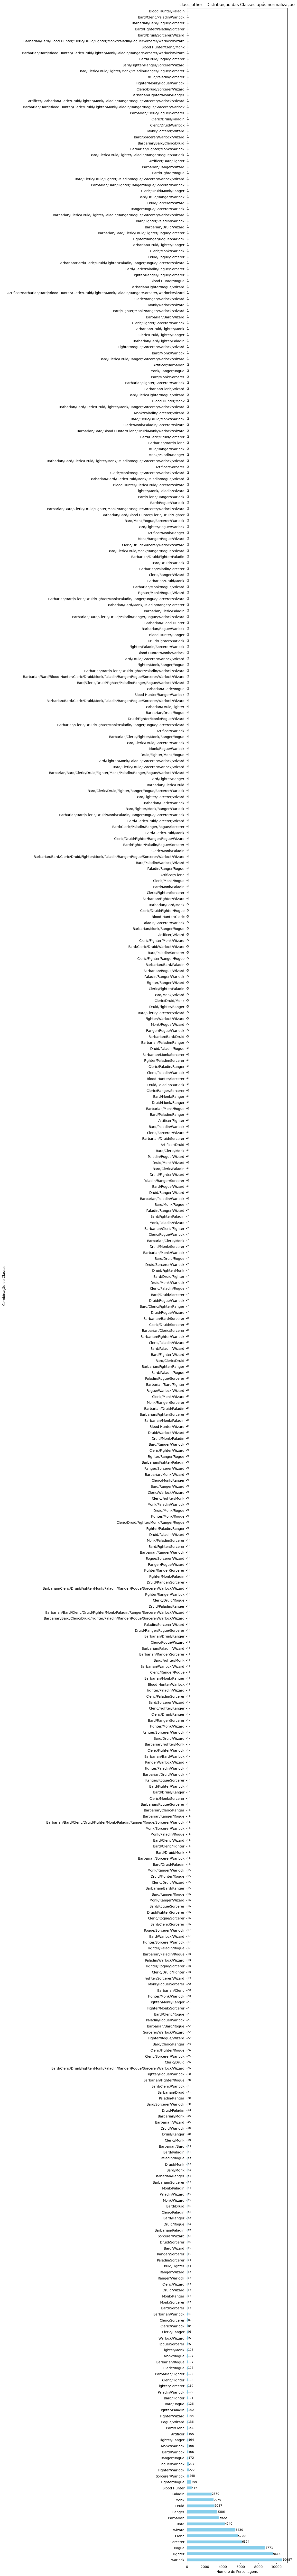

In [35]:
plt.figure(figsize=(12, max(6, int(len(df['class_other'].value_counts())/4))))
ax = df['class_other'].value_counts().plot(kind='barh', color='skyblue')
plt.title('class_other - Distribuição das Classes após normalização')
plt.xlabel('Número de Personagens')
plt.ylabel('Combinação de Classes')
plt.tight_layout()

# Adicionar o número exato ao lado de cada barra
for p in ax.patches:
    ax.annotate(str(int(p.get_width())), (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=9, color='black')

plt.show()

In [36]:
# NOTA IMPRTANTE: usar class_weight='balanced' no modelo para lidar com o desbalanceamento de classes!

### <h3>Unir a 'class_other' à 'class_staring'</h3>

Vamos unir as colunas, mas pode haver e há "partes" na class_other iguais à class_starting por exemplo: Figther na class_starting e Fighter/.../... na class_other

In [37]:
# Refazer indice sequencial que foi perdido com as operações anteriores
df.reset_index(drop=True, inplace=True)

In [38]:

#Construir listas de classes únicas para cada personagem

df['class_other'] = df['class_other'].fillna('') # Adicionado pq no pandas valores NaN(class_other) são tipo float, e quando se tanta fazer o split dá erro

superclasses_list = []
for i in range(len(df)):
    starting = df.loc[i, 'class_starting']
    other = df.loc[i, 'class_other']
    # Junta todas as classes numa lista
    if other:
        all_classes = [starting]
        for c in other.split('/'):
            c = c.strip()
            if c:
                all_classes.append(c)
    else:
        all_classes = [starting]
    # Remover duplicados manter ordem (NOTA: aqui perde-se a ordem original)
    classes_unicas = []
    for c in all_classes:
        if c not in classes_unicas:
            classes_unicas.append(c)
    superclasses_list.append(classes_unicas)

In [39]:
#Juntar as listas numa str e guardar na coluna superclasses

superclasses_strings = []
for classes in superclasses_list:
    superclasses_strings.append('/'.join(classes))

# Actualizar o dataframe
df['classes_combined'] = superclasses_strings



In [40]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979774 entries, 0 to 979773
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   base_hp               979774 non-null  int64 
 1   strength              979774 non-null  int64 
 2   dexterity             979774 non-null  int64 
 3   constitution          979774 non-null  int64 
 4   intelligence          979774 non-null  int64 
 5   wisdom                979774 non-null  int64 
 6   charisma              979774 non-null  int64 
 7   race                  979774 non-null  object
 8   class_starting        979774 non-null  object
 9   class_starting_level  979774 non-null  int64 
 10  class_other           979774 non-null  object
 11  total_level           979774 non-null  int64 
 12  classes_combined      979774 non-null  object
dtypes: int64(9), object(4)
memory usage: 97.2+ MB
None


In [41]:
# Por fim, vamos eliminar as colunas 'class_starting' e 'class_other', pois já temos a coluna 'classes_combined' que contém todas as informações necessárias.
df = df.drop(columns=['class_starting', 'class_other'])

In [42]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979774 entries, 0 to 979773
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   base_hp               979774 non-null  int64 
 1   strength              979774 non-null  int64 
 2   dexterity             979774 non-null  int64 
 3   constitution          979774 non-null  int64 
 4   intelligence          979774 non-null  int64 
 5   wisdom                979774 non-null  int64 
 6   charisma              979774 non-null  int64 
 7   race                  979774 non-null  object
 8   class_starting_level  979774 non-null  int64 
 9   total_level           979774 non-null  int64 
 10  classes_combined      979774 non-null  object
dtypes: int64(9), object(2)
memory usage: 82.2+ MB
None
   base_hp  strength  dexterity  constitution  intelligence  wisdom  charisma  \
0      103        12         17            18            14      16        16   
1       

### <h3>Normalização da 'race'

Para a normalização da 'race' foi adoptado um dataset de validação adquirido via webscrapping (ver: validation.py)

In [43]:
# Carregar o dicionário oficial de raças (dataset: unique_races_dict.csv)
race_dict = pd.read_csv("../unique_races_dict.csv")
print(race_dict.info())
print(race_dict.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   race      71 non-null     object
 1   category  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None
             race        category
0  Custom Lineage  Custom Lineage
1       Aarakocra          Exotic
2         Aasimar          Exotic
3      Changeling          Exotic
4      Deep Gnome          Exotic


Aqui o processo foi iterativo : correr esta parte do script, verificar se conseguimos uma boa normalização, adicionar mais regras no races_fixes, correr o script, verificar ,adicionar mais regras....

In [44]:
official_races = list(race_dict['race']) # criar lista com as raças oficiais
official_races_lower = [r.lower() for r in official_races] # colocar tudo a lower para facilitar a comparação

In [45]:
# Nova coluna para guardar a raça normalizada
df['race_normalized'] = ""

In [46]:
import difflib

# Ordenar raças oficiais por comprimento (prioridade para nomes maiores)
ordered_races = sorted(official_races_lower, key=lambda x: -len(x))

In [47]:
# Com ajuda do GPT adicionamos alguns casos particulares que podem falhar numa normalização mais "genérica"
races_fixes = {
    # Aarakocra variantes
    "owl aarakocra": "Aarakocra",
    "copy_of_aarakocra": "Aarakocra",
    "aarakocra (archived)": "Aarakocra",
    "aarakocra (ua)": "Aarakocra",

    # Aasimar variantes
    "protector aasimar": "Aasimar",
    "aasimar (protector)": "Aasimar",
    "aasimar (fallen)": "Aasimar",
    "aasimar (scourge)": "Aasimar",
    "aasimar (ua)": "Aasimar",
    "aasimar (volo's guide to monsters)": "Aasimar",
    "aasimar (dragon child)": "Aasimar",
    "copy_of_aasimar": "Aasimar",
    "aasimar (variant)": "Aasimar",

    # Yuan-Ti variantes
    "yuan-ti": "Yuan-Ti",
    "yuan ti": "Yuan-Ti",
    "serpentine yuan-ti": "Yuan-Ti",
    "yuan-ti malison": "Yuan-Ti",
    "yuan-ti pureblood": "Yuan-ti Pureblood",
    "yuan ti pureblood": "Yuan-ti Pureblood",
    "yuan-ti pureblood (revised)": "Yuan-ti Pureblood",
    "yuan-ti pureblood (archived)": "Yuan-ti Pureblood",
    "variant human to yuan-ti pureblood": "Yuan-ti Pureblood",

    # Warforged variantes
    "war forged": "Warforged",
    "warforge": "Warforged",
    "warforged (ua)": "Warforged",
    "warforged (subraces)": "Warforged",
    "warforged 2": "Warforged",
    "variant warforged": "Warforged",
    "warforged (eberron5e.com)": "Warforged",
    "surveyor warforged variant": "Warforged",
    "warforged adaptable": "Warforged",
    "warforged ua": "Warforged",
    "warforged (ax)": "Warforged",
    "arcforged": "Warforged",
    "gearforged": "Warforged",
    "grimfrost warforged": "Warforged",
    "relicforged": "Warforged",
    "warforged sentinel": "Warforged",

    # Outras variantes comuns
    "kobold (archived)": "Kobold",
    "kobold (improved)": "Kobold",
    "kobold urd": "Kobold",
    "orc (archived)": "Orc",
    "orc (revised)": "Orc",
    "orc of exandria": "Orc",
    "orc!": "Orc",
    "sun-hunter orc": "Orc",
    "orc of eberron": "Orc",
    "true orc": "Orc",
    "half elf": "Half-Elf",
    "half-elfo": "Half-Elf",
    "half-orc": "Half-Orc",
    "dragon born": "Dragonborn",
    "dragnborn": "Dragonborn",
    "tieflin": "Tiefling",
    "custom lineage": "Custom Lineage",
    "lineages": "Custom Lineage",
}

In [48]:
df['race_normalized'] = ""

for i in range(len(df)):
    raw_race = df.loc[i, 'race']
    if pd.isna(raw_race):
        df.loc[i, 'race_normalized'] = ""
        continue
    name_clean = str(raw_race).strip().lower()
    # 1. Corrigir variantes conhecidas
    if name_clean in races_fixes:
        df.loc[i, 'race_normalized'] = races_fixes[name_clean]
        continue
    # 2. Matching exato
    if name_clean in official_races_lower:
        idx = official_races_lower.index(name_clean)
        df.loc[i, 'race_normalized'] = official_races[idx]
        continue
    # 3. Matching por substring (ordem de prioridade)
    found = False
    for norm_race in ordered_races:
        if norm_race in name_clean:
            df.loc[i, 'race_normalized'] = official_races[official_races_lower.index(norm_race)]
            found = True
            break
    if found:
        continue
    # 4. Matching fuzzy (mais parecido)
    matches = difflib.get_close_matches(name_clean, official_races_lower, n=1, cutoff=0.7)
    if matches:
        idx = official_races_lower.index(matches[0])
        df.loc[i, 'race_normalized'] = official_races[idx]
        continue
    # 5. Fallback
    df.loc[i, 'race_normalized'] = str(raw_race).strip().title()

In [49]:
df[['race', 'race_normalized']].drop_duplicates().sort_values('race_normalized').to_csv("verificacao_races.txt", index=False, sep='\t')

In [50]:
# Adicionar coluna booleana: True se a raça normalizada é oficial
df['race_is_official'] = df['race_normalized'].isin(official_races)

In [51]:
# Contar e mostrar raças uniques normalizadas
print(f"Nº de raças únicas normalizadas: {df['race_normalized'].nunique()}")
print(f"Nº de raças oficiais: {len(official_races)}\n")
print("Nº de raças oficiais (True):", df[df['race_is_official']].race_normalized.nunique())
faltam = set(official_races) - set(df[df['race_is_official']]['race_normalized'].unique())
print("Raças oficiais que não aparecem no dataset:")
for r in faltam:
    print(f"  - {r}")

# Verificou-se no dataset original que não existem 2 raças: Autognome e Githyanki


Nº de raças únicas normalizadas: 693
Nº de raças oficiais: 71

Nº de raças oficiais (True): 69
Raças oficiais que não aparecem no dataset:
  - Githyanki
  - Autognome


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979774 entries, 0 to 979773
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   base_hp               979774 non-null  int64 
 1   strength              979774 non-null  int64 
 2   dexterity             979774 non-null  int64 
 3   constitution          979774 non-null  int64 
 4   intelligence          979774 non-null  int64 
 5   wisdom                979774 non-null  int64 
 6   charisma              979774 non-null  int64 
 7   race                  979774 non-null  object
 8   class_starting_level  979774 non-null  int64 
 9   total_level           979774 non-null  int64 
 10  classes_combined      979774 non-null  object
 11  race_normalized       979774 non-null  object
 12  race_is_official      979774 non-null  bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 90.6+ MB


In [53]:
print("Nº de raças oficiais (True):", df['race_is_official'].sum())
print("Nº de raças não oficiais (False):", (~df['race_is_official']).sum())
print("Total de linhas:", len(df))


Nº de raças oficiais (True): 975772
Nº de raças não oficiais (False): 4002
Total de linhas: 979774


In [54]:
# Apagar a coluna 'race' pois já temos a normalizada
df = df.drop(columns=['race'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979774 entries, 0 to 979773
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   base_hp               979774 non-null  int64 
 1   strength              979774 non-null  int64 
 2   dexterity             979774 non-null  int64 
 3   constitution          979774 non-null  int64 
 4   intelligence          979774 non-null  int64 
 5   wisdom                979774 non-null  int64 
 6   charisma              979774 non-null  int64 
 7   class_starting_level  979774 non-null  int64 
 8   total_level           979774 non-null  int64 
 9   classes_combined      979774 non-null  object
 10  race_normalized       979774 non-null  object
 11  race_is_official      979774 non-null  bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 83.2+ MB


In [55]:
# Remover linhas onde a raça não é oficial
df = df[df['race_is_official']]
df.head()

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level,classes_combined,race_normalized,race_is_official
0,103,12,17,18,14,16,16,20,20,Warlock,Tiefling,True
1,76,18,10,16,13,13,16,7,7,Paladin,Bugbear,True
2,127,10,14,16,16,15,18,2,16,Warlock/Bard/Cleric/Wizard,Gnome,True
3,52,10,10,15,12,14,10,6,6,Cleric,Half-Orc,True
4,41,15,8,14,16,13,16,5,5,Monk,Firbolg,True


In [56]:
# remover a coluna 'race_is_official', pois já não é necessária
df = df.drop(columns=['race_is_official'])

In [57]:
# Reset indice
df = df.reset_index(drop=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975772 entries, 0 to 975771
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   base_hp               975772 non-null  int64 
 1   strength              975772 non-null  int64 
 2   dexterity             975772 non-null  int64 
 3   constitution          975772 non-null  int64 
 4   intelligence          975772 non-null  int64 
 5   wisdom                975772 non-null  int64 
 6   charisma              975772 non-null  int64 
 7   class_starting_level  975772 non-null  int64 
 8   total_level           975772 non-null  int64 
 9   classes_combined      975772 non-null  object
 10  race_normalized       975772 non-null  object
dtypes: int64(9), object(2)
memory usage: 81.9+ MB
None


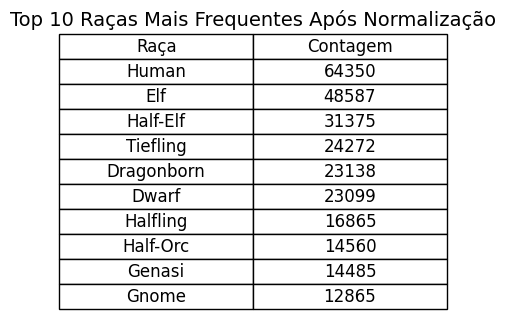

In [78]:

# Top 10 raças mais frequentes após normalização
top_races = df['race_normalized'].value_counts().head(10).reset_index()
top_races.columns = ['Raça', 'Contagem']

# Mostrar tabela como imagem (para relatórios ou apresentações)
fig, ax = plt.subplots(figsize=(5, 2.5))  # 5 polegadas ~ 500px
ax.axis('off')
tbl = ax.table(cellText=top_races.values, colLabels=top_races.columns, loc='center', cellLoc='center')
tbl.auto_set_font_size(True)
tbl.set_fontsize(12)
tbl.scale(1, 1.5)
plt.title("Top 10 Raças Mais Frequentes Após Normalização", fontsize=14, pad=15, y=1.15)
plt.show()

## <h2>11. Avaliação final ( ultima verificação)

In [59]:
print(df.isnull().sum())
print("\nTotal de linhas com pelo menos um valor nulo:", df.isnull().any(axis=1).sum())

base_hp                 0
strength                0
dexterity               0
constitution            0
intelligence            0
wisdom                  0
charisma                0
class_starting_level    0
total_level             0
classes_combined        0
race_normalized         0
dtype: int64

Total de linhas com pelo menos um valor nulo: 0


In [60]:
print(df.sample(10))

        base_hp  strength  dexterity  constitution  intelligence  wisdom  \
405984       38         8         10            13            12      18   
813878       10        15         10             8            12      14   
672840        6         3         18            14            15       7   
730223       29        14         17            14            15      15   
245938       10        14         15            15             9      13   
975209       44        13         13            15            14      16   
170839        8        15         14             7            15       6   
228672       10        15         12            15            13       8   
158862       10        14         15            10            12      13   
352906       42        12         13            10            10      15   

        charisma  class_starting_level  total_level classes_combined  \
405984        13                     7            7            Druid   
813878        13   

In [61]:
df.describe()

,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level
count,975772.000000,975772.000000,975772.000000,975772.000000,975772.000000,975772.000000,975772.000000,975772.000000,975772.000000
mean,26.600321,11.938554,13.110492,13.050657,11.669671,12.425661,12.126371,4.150579,4.455402
std,27.338368,3.027147,2.543675,2.160862,2.628400,2.570162,2.920249,4.430194,4.760108
min,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000
25%,8.000000,10.000000,12.000000,12.000000,10.000000,10.000000,10.000000,1.000000,1.000000
50%,16.000000,12.000000,13.000000,13.000000,12.000000,13.000000,12.000000,3.000000,3.000000
75%,34.000000,15.000000,15.000000,14.000000,14.000000,14.000000,15.000000,5.000000,6.000000
max,500.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000


In [62]:
df.isnull().sum()

base_hp                 0
strength                0
dexterity               0
constitution            0
intelligence            0
wisdom                  0
charisma                0
class_starting_level    0
total_level             0
classes_combined        0
race_normalized         0
dtype: int64

### Eliminar duplicados ( se existirem)

In [63]:
# Verificar duplicados
num_duplicados = df.duplicated().sum()
print(f"Número de linhas duplicadas: {num_duplicados}")




Número de linhas duplicadas: 658161


In [64]:
# Visualizar duplicados (se existirem)
if num_duplicados > 0:
    display(df[df.duplicated(keep=False)])


,base_hp,strength,dexterity,constitution,intelligence,wisdom,charisma,class_starting_level,total_level,classes_combined,race_normalized
6,62,8,14,13,17,12,15,13,15,Wizard/Sorcerer,Elf
7,58,12,15,15,13,15,16,14,14,Sorcerer,Human
9,12,8,14,12,14,14,10,1,1,Rogue,Dwarf
12,82,8,14,14,15,12,8,20,20,Wizard,Gnome
13,100,8,14,13,12,10,15,17,20,Warlock/Sorcerer,Tiefling
...,...,...,...,...,...,...,...,...,...,...,...
975767,6,11,14,10,18,14,8,1,1,Sorcerer,Human
975768,64,10,8,14,13,14,14,13,13,Warlock,Tiefling
975769,19,13,13,15,11,12,9,2,2,Barbarian,Half-Orc
975770,53,8,13,15,12,10,14,10,10,Bard,Half-Elf


In [65]:
# Eliminar duplicados
df = df.drop_duplicates().reset_index(drop=True)
print(f"Shape após remoção de duplicados: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)

Shape após remoção de duplicados: (317611, 11)


In [66]:
print("numero total de linhas apos remoção de duplicados:", len(df))

numero total de linhas apos remoção de duplicados: 317611


In [67]:

# Verificar se cada linha de 'classes_combined' contém pelo menos uma classe oficial

classes_presentes = set()
for linha in df['classes_combined']:
    for c in linha.split('/'):
        classes_presentes.add(c.strip())

faltam_classes = [c for c in classes_oficiais if c not in classes_presentes]
if faltam_classes:
    print("Faltam estas classes oficiais:", faltam_classes)
else:
    print("Todas as classes oficiais estão presentes no dataset!")

Todas as classes oficiais estão presentes no dataset!


In [68]:
# Verificar se todas as raças estão presentes (69 raças unique oficiais)

num_racas_unique = df['race_normalized'].nunique()
print(f"Número de raças únicas normalizadas no dataset: {num_racas_unique}")

if num_racas_unique == 69:
    print("raças únicas oficiais continua 69.")
else:
    print(f"número de raças únicas oficiais é {num_racas_unique}, diferente de 69.")

Número de raças únicas normalizadas no dataset: 69
raças únicas oficiais continua 69.


## <h2> 12.Exportação de dataset limpo para trabalho de modelação

In [69]:
df.to_csv("../Data/dnd_dataset_cleanned.csv", index=False)

Outro codigo do Sardinha (não considerar esta parte abaixo)

In [70]:
# # Load the cleaned dataset
# df_clean = pd.read_csv("../data/dnd_dataset_cleanned.csv")

# # --- Step 1: Drop rows where class_starting is repeated in class_other ---
# df_multiclass = df_clean.dropna(subset=['class_other']).copy()

# def sort_slash_separated(input_str):
#     items = input_str.split('/')
#     sorted_items = sorted(item.strip() for item in items)
#     return '/'.join(sorted_items)

# df_multiclass['class_other_sorted'] = df_multiclass['class_other'].apply(sort_slash_separated)

# df_multiclass['starting_in_other'] = df_multiclass.apply(
#     lambda row: row['class_starting'] in row['class_other_sorted'].split('/'), axis=1
# )

# repeated_indices = df_multiclass[df_multiclass['starting_in_other'] == True].index
# df_clean = df_clean.drop(index=repeated_indices)

# # --- Step 2: Merge and sort all classes into a consistent "classes" column ---
# df_clean['class_other'] = df_clean['class_other'].fillna('')

# def merge_and_sort_classes(row):
#     # Collect all classes (starting + others)
#     class_list = [row['class_starting']] + [c.strip() for c in row['class_other'].split('/') if c.strip()]
#     class_list_sorted = sorted(class_list)
#     return '/'.join(class_list_sorted)

# df_clean['classes'] = df_clean.apply(merge_and_sort_classes, axis=1)

# # Drop unused columns
# df_clean = df_clean.drop(columns=['class_starting', 'class_other'])

# # --- Step 3: Drop rows with more than 3 classes ---
# df_clean = df_clean[df_clean['classes'].apply(lambda x: len(x.split('/')) <= 3)]

# # Output preview
# print(df_clean[['classes']].head())

# # Save final cleaned file
# df_clean.to_csv("../data/dnd_dataset_cleaned_with_classes.csv", index=False)

In [71]:
# import pandas as pd

# # Load cleaned character dataset
# df_clean = pd.read_csv("../data/dnd_dataset_cleaned_with_classes.csv")

# # Load official race list with categories
# df_race_dict = pd.read_csv("../unique_races_dict.csv")

# # --- STEP 1: Normalize race names in df_clean ---
# def normalize_race(name):
#     if pd.isna(name):
#         return ""

#     name = name.strip().lower()

#     # Define mappings from variants to official race names
#     replacements = {
#         "dragonborn (sphaeran variant)": "Dragonborn",
#         "dragonborn legacy": "Dragonborn",
#         "purple dragonborn": "Dragonborn",
#         "dexterous dragonborn": "Dragonborn",
#         "dragonborn ii": "Dragonborn",
#         "dragonborn (breath weapon modified)": "Dragonborn",
#         "dragonborn (variant)": "Dragonborn",
#         "draconic races (archived)": "Dragonborn",
#         "warmage dragonborn": "Dragonborn",

#         "tiefling (azazel)": "Tiefling",
#         "feral tiefling": "Tiefling",
#         "tiefling - zariel variant": "Tiefling",
#         "abyssal tiefling": "Tiefling",
#         "winged tiefling": "Tiefling",
#         "newly minted tiefling": "Tiefling",
#         "tiefling variant": "Tiefling",
#         "tiefling of the sun": "Tiefling",
#         "tiefling [glasya ancestry]": "Tiefling",

#         "half-elf (speed variant)": "Half-Elf",
#         "copy_of_half-elf": "Half-Elf",
#         "half-elf variant": "Half-Elf",
#         "additional feat half-elf": "Half-Elf",
#         "half elf (variant)": "Half-Elf",

#         "orc (archived)": "Orc",
#         "orc (revised)": "Orc",
#         "true orc": "Orc",
#         "orc of eberron": "Orc",
#         "orc of exandria": "Orc",
#         "orc!": "Orc",
#         "sun-hunter orc": "Orc",

#         "kobold (archived)": "Kobold",
#         "kobold (improved)": "Kobold",
#         "kobold urd": "Kobold",

#         "changeling (ua)": "Changeling",
#         "minotaur (ua)": "Minotaur",
#         "centaur-ua": "Centaur",
#         "loxodon ": "Loxodon",  # trailing space
#         "fairy (archived)": "Fairy",

#         "yuan-ti pureblood": "Yuan-ti Pureblood",
#         "yuan ti pureblood": "Yuan-ti Pureblood",
#         "yuan-ti": "Yuan-ti Pureblood",
#         "serpentine yuan-ti": "Yuan-ti Pureblood",
#         "yuan-ti pureblood (revised)": "Yuan-ti Pureblood",

#         "warforged ": "Warforged",
#         "warforged (ua)": "Warforged",
#         "warforged (subraces)": "Warforged",
#         "warforged 2": "Warforged",
#         "variant warforged": "Warforged",
#         "warforged (eberron5e.com)": "Warforged",
#         "surveyor warforged variant": "Warforged",
#         "warforged adaptable": "Warforged",
#         "war forged": "Warforged",

#         "custom lineage": "Custom Lineage",
#         "lineages": "Custom Lineage",

#         # General canonical mappings
#         "elf": "Elf",
#         "dwarf": "Dwarf",
#         "halfling": "Halfling",
#         "human": "Human",
#         "gnome": "Gnome",
#         "goliath": "Goliath",
#         "aasimar": "Aasimar",
#         "genasi": "Genasi",
#         "tabaxi": "Tabaxi",
#         "firbolg": "Firbolg",
#         "tortle": "Tortle",
#         "goblin": "Goblin",
#         "hobgoblin": "Hobgoblin",
#         "bugbear": "Bugbear",
#         "kenku": "Kenku",
#         "aarakocra": "Aarakocra",
#         "kender": "Kender",
#     }

#     # Clean up weird cases (e.g., quotes, casing)
#     name = name.replace('"', '').strip()

#     # Apply mapping if matched
#     if name in replacements:
#         return replacements[name]

#     # Fallback general rules
#     if "genasi" in name:
#         return "Genasi"
#     if "dragonborn" in name:
#         return "Dragonborn"
#     if "tiefling" in name:
#         return "Tiefling"
#     if "orc" in name and "half" not in name:
#         return "Orc"
#     if "half-elf" in name:
#         return "Half-Elf"
#     if "half-orc" in name:
#         return "Half-Orc"
#     if "elf" in name:
#         return "Elf"
#     if "dwarf" in name:
#         return "Dwarf"
#     if "halfling" in name:
#         return "Halfling"
#     if "kender" in name:
#         return "Kender"
#     if "custom" in name:
#         return "Custom Lineage"

#     return name.title()

# # --- STEP 2: Apply normalization and overwrite 'race' ---
# df_clean['race'] = df_clean['race'].apply(normalize_race)

# # --- STEP 3: Filter only allowed races ---
# allowed_races = set(df_race_dict['race'])
# df_clean = df_clean[df_clean['race'].isin(allowed_races)]

# # --- STEP 4: Get unique races used ---
# unique_races_used = sorted(df_clean['race'].unique())

# # --- STEP 5: Group races by category ---
# grouped_races = (
#     df_race_dict[df_race_dict['race'].isin(unique_races_used)]
#     .groupby('category')['race']
#     .apply(list)
#     .to_dict()
# )

# # --- OUTPUT ---
# print("✅ Unique Races Used:")
# print(unique_races_used)

# print("\n✅ Races Grouped by Category:")
# for category, races in grouped_races.items():
#     print(f"{category} ({len(races)}): {races}")

# # Save grouped races by category
# pd.DataFrame({'category': grouped_races.keys(), 'races': grouped_races.values()}).to_csv(
#     "../data/valid_races_grouped_by_category.csv", index=False
# )

# # Save the cleaned and filtered character dataset
# df_clean.to_csv("../data/dnd_dataset_filtered_by_race.csv", index=False)

In [72]:
# import os
# import pandas as pd

# # --- Load data ---
# # Your filtered and normalized character dataset
# df_clean = pd.read_csv("../data/dnd_dataset_filtered_by_race.csv")

# # Your official race-to-category mapping
# df_race_dict = pd.read_csv("../unique_races_dict.csv")

# # Create a dictionary for fast category lookup
# race_to_category = dict(zip(df_race_dict['race'], df_race_dict['category']))

# # Base directory to store output
# base_dir = "../data/cleaned_datasets"

# # Iterate over races and write files into subfolders based on category
# for race, group in df_clean.groupby("race"):
#     # Lookup category; default to 'Unknown' if not found
#     category = race_to_category.get(race, "Unknown")

#     # Create subdirectory for category
#     category_dir = os.path.join(base_dir, category)
#     os.makedirs(category_dir, exist_ok=True)

#     # Make race filename safe
#     safe_race_name = race.replace(" ", "_").replace("/", "_").replace("\\", "_")
#     filepath = os.path.join(category_dir, f"{safe_race_name}.csv")

#     # Save CSV
#     group.to_csv(filepath, index=False)

# print(f"✅ Saved {df_clean['race'].nunique()} race datasets into categorized folders under '{base_dir}/'")

In [73]:
# import matplotlib.pyplot as plt

# # Load the filtered dataset
# df_clean = pd.read_csv("../data/dnd_dataset_filtered_by_race.csv")

# # Ask for a race input
# selected_race = input("Enter the race you want to inspect : ").strip().title()

# # Filter by the selected race
# filtered_df = df_clean[df_clean['race'] == selected_race]

# if filtered_df.empty:
#     print(f"⚠️ No characters found for race: {selected_race}")
# else:
#     # Plot class distribution for the selected race
#     plt.figure(figsize=(100, 60))
#     ax = filtered_df['classes'].value_counts().plot(kind='bar', color='skyblue')
#     plt.title(f'Distribuição das Classes para {selected_race}')
#     plt.xlabel('Classe')
#     plt.ylabel('Número de Personagens')
#     plt.xticks(rotation=45, ha='right')
#     plt.tight_layout()

#     # Add exact numbers on top of each bar
#     for p in ax.patches:
#         ax.annotate(str(int(p.get_height())), 
#                     (p.get_x() + p.get_width() / 2, p.get_height()), 
#                     ha='center', va='bottom', fontsize=10)

#     plt.show()
